<a href="https://colab.research.google.com/github/rushikeshmarkad8265/Machine-Learning/blob/main/Multi_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


   year  sales
0     1     60
1     2     55
2     3     65
3     4     70
4     5     80
Accuracy: 0.901206234275586
Prediction for 9th year: 94.7857142857143


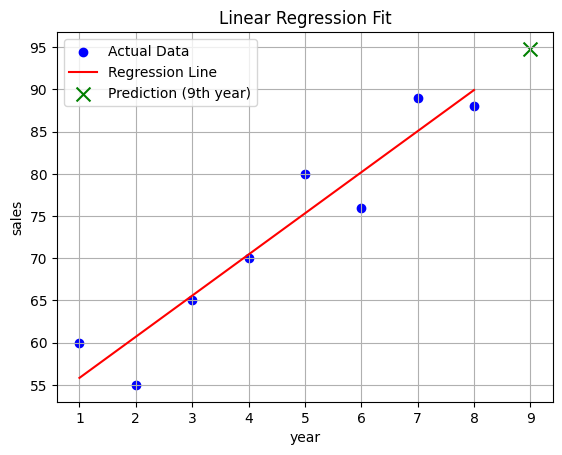

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/dataset.csv'

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Read CSV file
pf = pd.read_csv(file_path)

# Display dataset
print(pf.head())

# Split dataset
X = pf.iloc[:, :-1]  # Features (as DataFrame)
y = pf.iloc[:, -1]   # Target (last column)

# Train model
reg = LinearRegression()
reg.fit(X, y)

accuracy=reg.score(X,y)
print(f"Accuracy: {accuracy}")

# Predict for a single value (fix: use DataFrame with column name)
# Get the column name used during training
column_name = X.columns[0]
y_pred_single = reg.predict(pd.DataFrame({column_name: [9]}))
print(f"Prediction for 9th year: {y_pred_single[0]}")

# Plotting
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, reg.predict(X), color='red', label='Regression Line')
plt.scatter([9], y_pred_single, color='green', marker='x', s=100, label='Prediction (9th year)')
plt.xlabel(column_name)
plt.ylabel(y.name)
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()


First 5 rows of dataset:
    year  sales
0     1     60
1     2     55
2     3     65
3     4     70
4     5     80


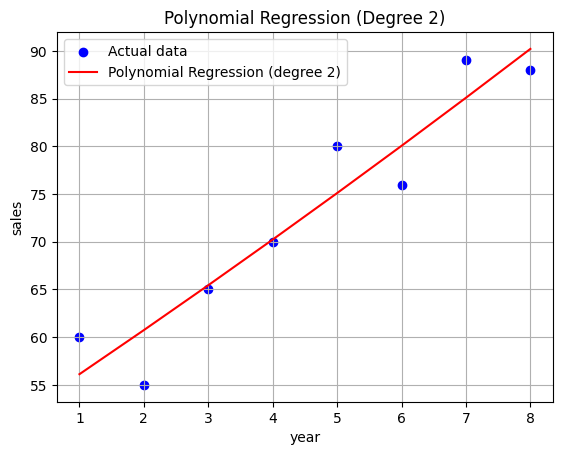

Prediction for input 9: 95.41071428571426
Accuracy: 0.9014702158722975
Model Coefficients: [0.         4.49404762 0.04166667]
Model Intercept: 51.589285714285744


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/dataset.csv'

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load dataset
pf = pd.read_csv(file_path)
print("First 5 rows of dataset:\n", pf.head())

# Feature and label
X = pf.iloc[:, [0]]  # DataFrame (preserves column name)
y = pf.iloc[:, -1]   # Series

# Create polynomial features
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Predict all
y_pred = model.predict(X_poly)

# Plotting
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label=f'Polynomial Regression (degree {degree})')
plt.xlabel(X.columns[0])
plt.ylabel(y.name)
plt.title(f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.grid(True)
plt.show()

# ✅ Predict a single value — using DataFrame to avoid warning
x_val = 9
# Create DataFrame with same column name as X
x_val_df = pd.DataFrame({X.columns[0]: [x_val]})
x_val_poly = poly.transform(x_val_df)
prediction = model.predict(x_val_poly)
print(f"Prediction for input {x_val}: {prediction[0]}")


accuracy=model.score(X_poly,y)
print(f"Accuracy: {accuracy}")

# Coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


In [ ]:
# predefine dataset import
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
# splitting dataset with training and testing
from sklearn.model_selection import train_test_split
# parameters to check accuracy of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import pandas as pd
import matplotlib.pyplot as plt


# Load the Iris dataset
iris = load_iris() # function to load the data
X = iris.data[:, :2]
y = (iris.target == 0).astype(int)
# satosa to 1 and other to 0
# variable for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
# model fitting
y_pred = model.predict(X_test)

print(f"Accuracy: ",accuracy_score(y_test, y_pred))
print(f"Classification Report: \n",classification_report(y_test, y_pred))
print(f"Confusion Matrix: \n",confusion_matrix(y_test, y_pred))




Accuracy:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix: 
 [[10  0]
 [ 0 20]]
